In [ ]:
 #banco de dados referentes ao credito

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

german_credit = fetch_openml(name='credit', version=1)

X = german_credit.data
y = german_credit.target

#Criar o dataframe com as features
dados = pd.DataFrame(data=X, columns=german_credit.feature_names)

#Adicionar rotulos
dados['target'] = y

#exibir o data frame
dados.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,target
0,0.006999,38,0,0.302150,5440.0,4,0,1,0,3.0,0
1,0.704592,63,0,0.471441,8000.0,9,0,1,0,0.0,0
2,0.063113,57,0,0.068586,5000.0,17,0,0,0,0.0,0
3,0.368397,68,0,0.296273,6250.0,16,0,2,0,0.0,0
4,1.000000,34,1,0.000000,3500.0,0,0,0,0,1.0,0


In [ ]:
#Verifica de tem informações faltantes
dados.isnull().sum()

,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0
NumberOfDependents,0


In [ ]:
#Calcular medidas descritivas das variáveis numéricas
#Informações dos clientes para analisar o credito, a taxa de divida, e forma de utilização de linhas n seguras e idade
dados2 = dados[['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio']]
dados2.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,16714.0,4.799862,204.062345,0.0,0.082397,0.443080,0.926637,22000.0
age,16714.0,48.798672,13.906078,21.0,38.000000,48.000000,58.000000,101.0
DebtRatio,16714.0,30.980298,719.694859,0.0,0.155971,0.322299,0.533426,61106.5


In [ ]:
#Para variaveis categoricas - contagem
dados['target'].value_counts()

,count
target,
0,8357
1,8357


rotulos
inadiplente    8357
pagador        8357
Name: count, dtype: int64


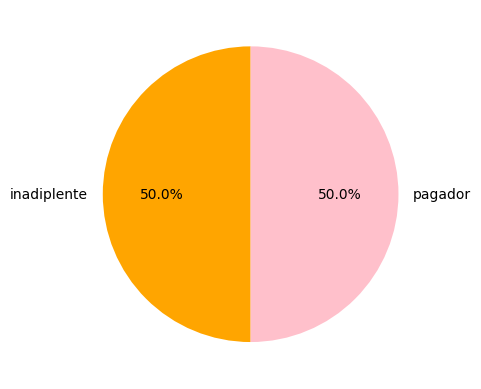

In [ ]:
#grafico de pizza é adequado para variáveis qualitativas
import matplotlib.pyplot as plt
dados['rotulos'] = dados['target'].map({0:'inadiplente', 1:'pagador'})

contagem = dados['rotulos'].value_counts()
print(contagem)

plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle = 90, colors=['orange', 'pink'])
plt.show()

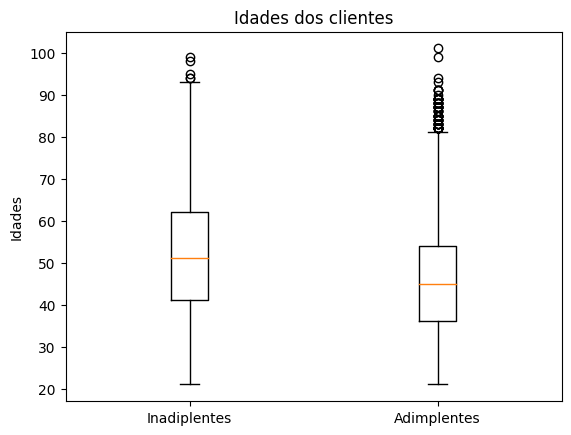

In [ ]:
#grafico boxplot da idade para o bom pagamento do cliente - para variáveis quantitativas (numericas)
inadiplemtes = dados[dados['rotulos']=='inadiplente']
adimplentes = dados[dados['rotulos']=='pagador']

#verificar a diferença de idade entre adiplentes e inadiplentes
dados_boxplot = [inadiplemtes['age'], adimplentes['age']]

labels_credito = ['Inadiplentes', 'Adimplentes']

plt.boxplot(dados_boxplot, labels=labels_credito)
plt.ylabel('Idades')
plt.title('Idades dos clientes')
plt.show()
#

In [ ]:
#Classificação com SVM
#Variáveis mt parecidas

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#dividir o conjunto de dados em treino e tetse

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=10)
print('quantidade de dados de treino', np.shape(X_treino))
print('quantidade de dados de teste', np.shape(X_teste))

#treinar o modelo
svm = SVC(kernel='rbf')
svm.fit(X_treino, y_treino)
#previsao
y_predito = svm.predict(X_teste)
#acuracia
print(accuracy_score(y_teste, y_predito))

quantidade de dados de treino (13371, 10)
quantidade de dados de teste (3343, 10)
0.5632665270714927


SVM COM PADRONIZAÇÃO

In [ ]:
from sklearn.preprocessing import StandardScaler

padronizar = StandardScaler()
X_padronizado = padronizar.fit_transform(X)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_padronizado, y, test_size=0.2, random_state=10)

svm = SVC(kernel='rbf')
svm.fit(X_treino, y_treino)
y_predito = svm.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

0.7218067603948549


SVM COM NORMALIZAÇÃO

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizar = MinMaxScaler()
X_normalizado = normalizar.fit_transform(X)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.2, random_state=10)

svm = SVC(kernel='rbf')
svm.fit(X_treino, y_treino)
y_predito = svm.predict(X_teste)
print(accuracy_score(y_teste, y_predito))

0.7062518695782232


SEPARAÇÃO COM PADRONIZAÇÃO E  HOLDOUT COM *REPETIÇÃO*

In [ ]:
padronizar = StandardScaler()
X_padronizado = padronizar.fit_transform(X)

acc = []

for repeticao in range(5):

  X_treino, X_teste, y_treino, y_teste = train_test_split(X_padronizado, y, test_size=0.2, random_state=repeticao)

  svm = SVC(kernel='rbf')
  svm.fit(X_treino, y_treino)
  y_predito = svm.predict(X_teste)
  acuracia = accuracy_score(y_teste, y_predito)
  acc.append(acuracia)


print(acc)
print(np.mean(acc))

[0.7298833383188753, 0.7200119653006282, 0.7203110978163326, 0.7292850732874664, 0.731678133413102]
0.7262339216272808


--------------------------------------------------------------------------------

FAZENDO EXEMPLOS DOS TRABALHOS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
url_titanic =  "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_data = pd.read_csv(url_titanic)
print(titanic_data.head(),'\n\n')
# Variáveis Explicativas
titanic_features = titanic_data.drop(["Survived", "Name"], axis=1)
titanic_features['Sex'] = titanic_features['Sex'].map({'male': 0, 'female': 1})
# Variável Resposta
titanic_target = titanic_data["Survived"]

print("Titanic Dataset Features:")
print(titanic_features.head())
print("\nTitanic Dataset Target:")
print(titanic_target.head())



X = titanic_features
y = titanic_target
print(set(y))

   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500   


Titanic Dataset Features:
   Pclass  Sex   Age  Siblings/Spouses Aboard  Parents/Children 

In [ ]:
titanic_features2 = titanic_features[["Sex", "Age"]]
titanic_features2.head()

,Sex,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [ ]:
titanic_features2.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,887.0,0.354002,0.478480,0.00,0.00,0.0,1.0,1.0
Age,887.0,29.471443,14.121908,0.42,20.25,28.0,38.0,80.0


In [ ]:
titanic_target.value_counts()

,count
Survived,
0,545
1,342


In [ ]:
age_counts = titanic_features2["Age"].value_counts()

# Ordena a contagem em ordem decrescente
age_counts_sorted = age_counts.sort_values(ascending=False)
print(age_counts_sorted)

Age
22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
0.42      1
34.50     1
80.00     1
20.50     1
74.00     1
Name: count, Length: 89, dtype: int64


Survived
Morto    545
Vivo     342
Name: count, dtype: int64


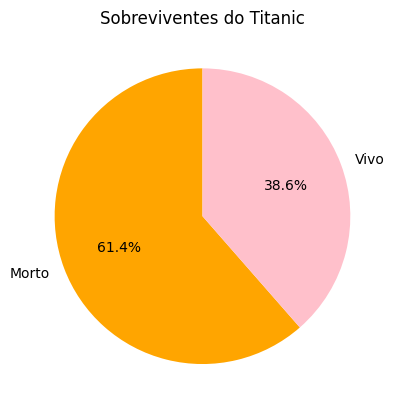

In [ ]:
#Grafico de pizza de mortos ou vivos
import matplotlib.pyplot as plt

titanic_target3 = titanic_target.map({0:'Morto', 1:'Vivo'})

contagem = titanic_target3.value_counts()

print(contagem)

plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%', startangle = 90, colors=['orange', 'pink'])
plt.title('Sobreviventes do Titanic')
plt.show()

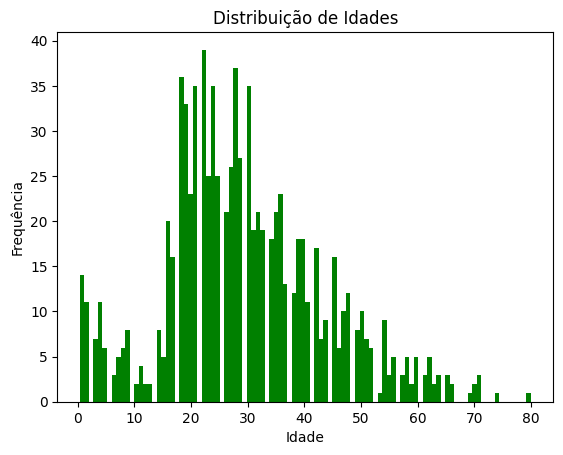

In [ ]:
#Histograma
plt.hist(titanic_features2["Age"], bins=100, color='green')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

HOUDOUT COM REPETICAO COM *SVM*

In [ ]:
from sklearn.svm import SVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array(X)
y = np.array(y)


acc = []

for repeticao in range(5):
  X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=repeticao)

  svm = SVC(kernel='rbf')
  svm.fit(X_treino, y_treino)
  y_predito = svm.predict(X_teste)
  acuracia = accuracy_score(y_teste, y_predito)
  acc.append(acuracia)

print(acc)
print(np.mean(acc))


ImportError: cannot import name 'SVM' from 'sklearn.svm' (/usr/local/lib/python3.10/dist-packages/sklearn/svm/__init__.py)